# Introdution

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.


**Data sources:**

`okcupid_profiles.csv` was provided by Kaggle.com: [OkCupid Profiles](https://www.kaggle.com/andrewmvd/okcupid-profiles)

### Project Goals

In this project, the goal is analyzes the data from Kaggle using tools of Data Science. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles.


### Data

The project has one data set provided by Kaggle called `okcupid_profiles.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice and short answer questions.

### Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

### Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 


## Import Python Modules

First import the modules being used for this project:

In [1]:
##Bibliotecas Gerais
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

To analyze the user profiles from OkCupid, pandas will be used to load the dataset into a `DataFrame` so that it can be explored and visualized with Python.

In [2]:
df = pd.read_csv('okcupid_profiles.csv', encoding='utf-8')
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [3]:
print(df['last_online'].head())
print(df.shape)

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object
(59946, 31)


#### Data Characteristics

`profiles` has 59,946 rows and 31 columns, this is a good sign since there seems to be enough data for machine learning.

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

## Explore the Data

First to be explored is the number of unique signs, and the values. It seems that there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be qualifiers attached with the signs. 

In [4]:
print('number of categories:', df['sign'].nunique())
print('categories:', df['sign'].unique())

number of categories: 48
categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

#### Clean labels

It is important that we clean the labels since this is what will be predicted and 48 predictions would be quite difficult. By taking the first word of the column, the signs can be saved without the qualifiers. The qualifiers could be used for another problem down the line.

In [5]:
df['signs_cleaned'] = df['sign'].str.split().str.get(0)
print('number of categories:', df['signs_cleaned'].nunique())
print('categories:', df['signs_cleaned'].unique())

number of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


## Continous Variables

#### age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

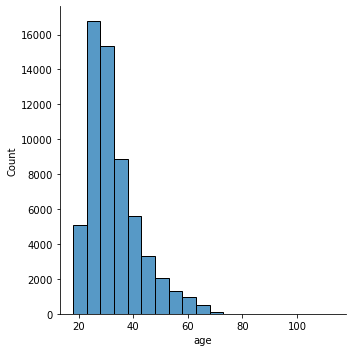

In [6]:
sns.displot(data=df, x='age', kind='hist', binwidth=5);

Here is the same chart but broken down by gender. It seems that are proportionally similar break of gender by age, but slightly fewer females overall.

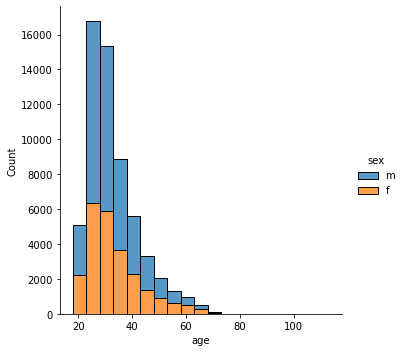

In [7]:
sns.displot(data=df, x='age', hue='sex', kind='hist', binwidth=5, multiple='stack');

#### Height

The next plot shows the height variable. most people look like they are between 1.5 and 2 meters tall.

In [8]:
#Passando polegadas para centímetros
df['height'] = df.apply(lambda x: df['height'] * 2.54)

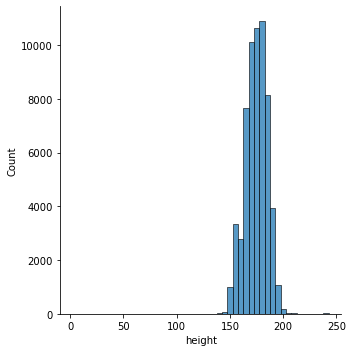

In [9]:
#Passando para centímetros
sns.displot(data=df, x='height', kind='hist', binwidth=5);

Here is the same height chart showing the break down by gender. It seems obvious, but females tend to be shorter than males and looks to have a normal distribution. 

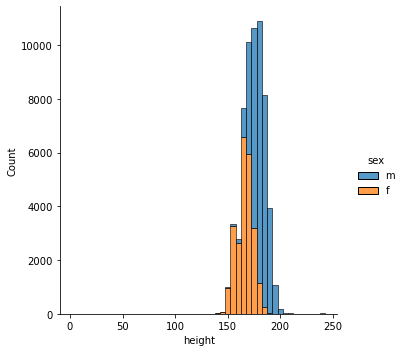

In [10]:
sns.displot(data=df, x='height', hue='sex', kind='hist', binwidth=5, multiple='stack');

#### Income

Here is the data of income, it seems that the majority of the participants do not include their income figures.

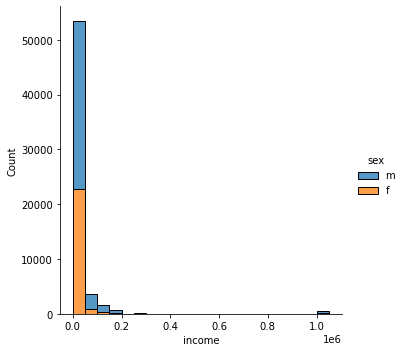

In [11]:
sns.displot(data=df, x='income', hue='sex', kind='hist', binwidth=50000, multiple='stack');

### Discrete Variables

#### Sex

Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

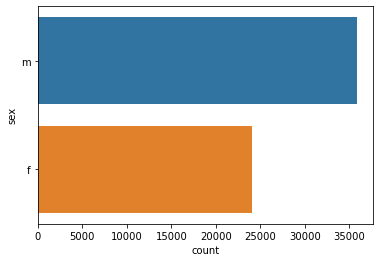

In [12]:
sns.countplot(data=df, y='sex');

#### Body Type

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

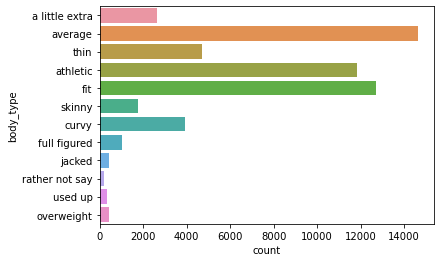

In [13]:
sns.countplot(data=df, y='body_type');

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

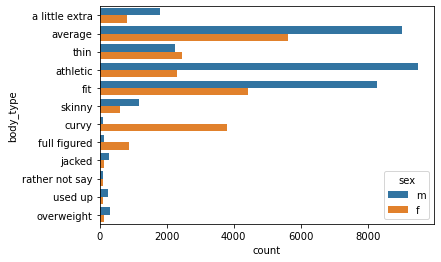

In [14]:
sns.countplot(data=df, y='body_type', hue='sex');

#### Diet

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

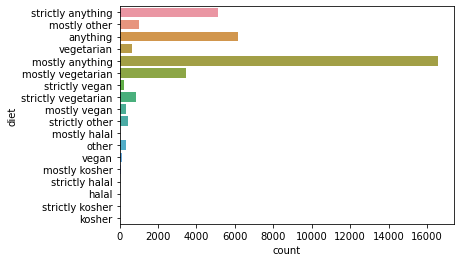

In [15]:
sns.countplot(data=df, y='diet');

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

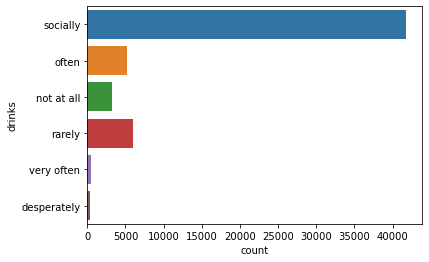

In [16]:
sns.countplot(data=df, y='drinks');

#### Drugs

The vast majority of users "never" use drugs. 

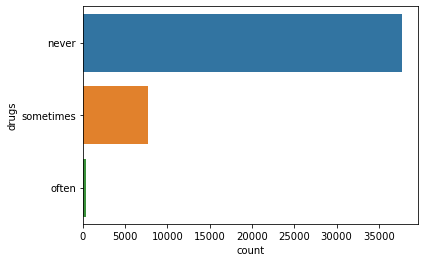

In [17]:
sns.countplot(data=df, y='drugs');

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

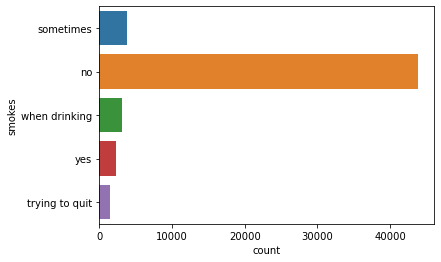

In [18]:
sns.countplot(data=df, y="smokes");

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

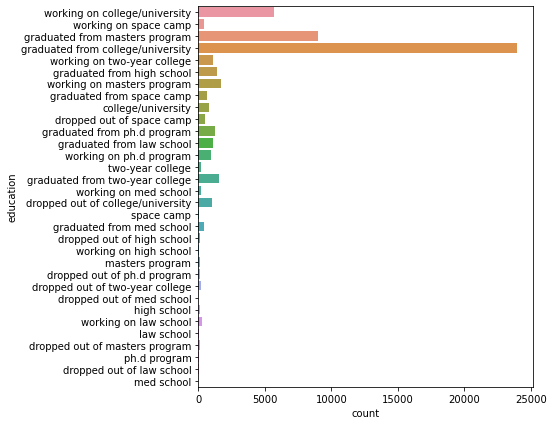

In [19]:
plt.figure(figsize=(6,7))

sns.countplot(data=df, y='education');

#### Jobs

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks.

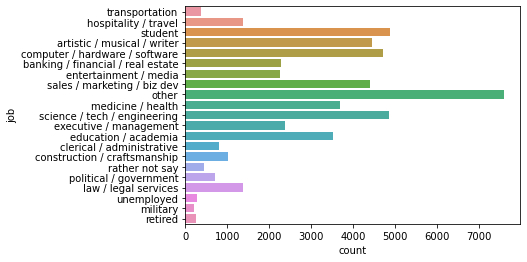

In [20]:
sns.countplot(data=df, y='job');

#### Offspring

The data suggest that most users do not have kids. 

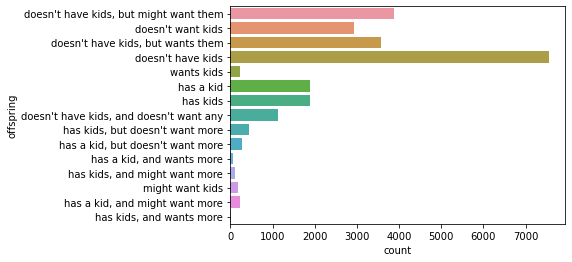

In [21]:
sns.countplot(data=df, y='offspring');

#### Orientation

The majority of users are straight.

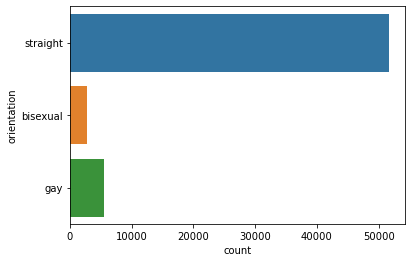

In [22]:
sns.countplot(data=df, y='orientation');

#### Pets

The chart shows that most users like or has dogs.

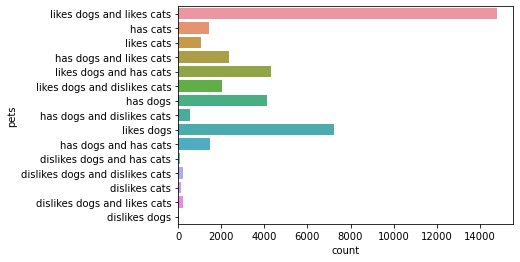

In [23]:
sns.countplot(data=df, y='pets');

#### Religion

Religion was similar to sign where there are a lot of qualifiers.

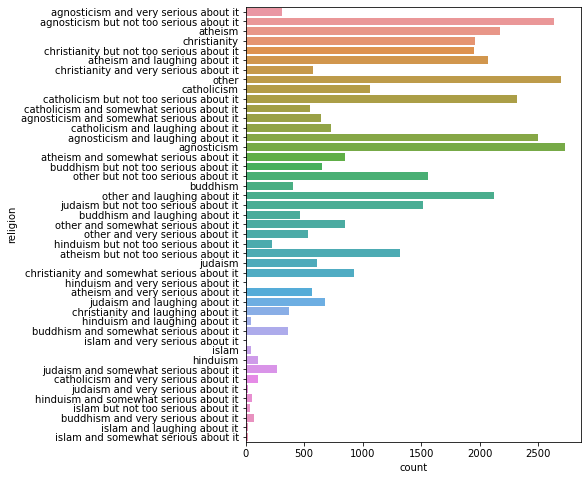

In [24]:
plt.figure(figsize=(6, 8))
sns.countplot(data=df, y='religion');

religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

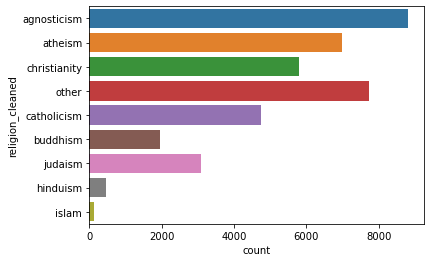

In [25]:
df['religion_cleaned'] = df['religion'].str.split().str.get(0)
sns.countplot(data=df, y='religion_cleaned');

#### Signs

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

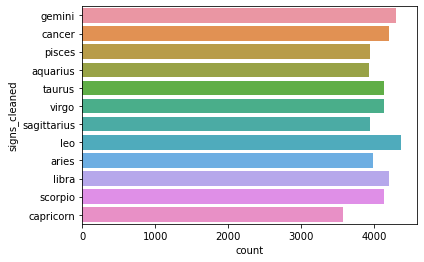

In [26]:
sns.countplot(data=df, y='signs_cleaned');

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

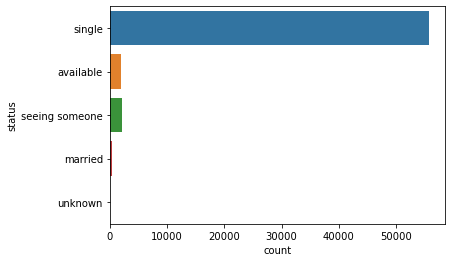

In [27]:
sns.countplot(data=df, y="status");

### Data Preperation

#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [28]:
df.isnull().sum()

age                     0
status                  0
sex                     0
orientation             0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
pets                19921
religion            20226
sign                11056
smokes               5512
speaks                 50
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
signs_cleaned       11056
religion_cleaned    20226
dtype: int64

#### Preprocessing 

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others.

The data for the model is going to be a subset of the variables. The variables were selected because they might be a good predictor for astrological signs, where some of the variables that were not selected such as `age` is probably not a good indicator. 

Here na values are dropped to create a fully complete data set. 

In [29]:
colunas = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 
          'sex', 'job', 'signs_cleaned']
df1 = df[colunas].dropna()
df1.shape

(16453, 8)

#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict signs. 

In [30]:
for i in colunas[:-1]:
    df1 = pd.get_dummies(df1, columns=[i], prefix=[i])

In [31]:
df1.head()

,signs_cleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Label Imbalance 

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be bad. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions. 

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [32]:
df1['signs_cleaned'].value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signs_cleaned, dtype: int64

#### Splitting Data

Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for trainnig the model.

In [33]:
largura_col = len(df1.columns)

#Seperando os dados, X são as entradas e Y a saída
X = df1.iloc[:, 1:largura_col]
y = df1.iloc[:, 0:1]

#Seperando os dados em blocos
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

#vetores em 1 dimensão
y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

### Prediction 

#### model building 

Now it's time to create some models, here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. For this project three common algorithms will be used to make predictions.

Below, the respective modules for Logistic Regression, Decision Trees, and KNN are loaded.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Evaluation Metrics

In the models, there will be several values that can be evaluated below is a quick diagram:
![](https://miro.medium.com/max/1400/1*UVP_xb4F6J-M-xH3haz5Jw.png)
here is a quick description of the metrics:

- **Accuracy:** is the correct values divided by total values
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values.
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses.
- **F1-score:** is a blended score of precision and recall which balances both values.
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict. 

#### Logistic Regression

The first model is using logistic regression with the `multi_class="multinomial"` argument. Using `lr_model` predictions are created from the training dataset which is used to figure out how well the model preformed.

In [35]:
lr_modelo = LogisticRegression(multi_class='multinomial').fit(X_train, y_train)
lr_predicoes = lr_modelo.predict(X_train)

The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr_predicoes))

              precision    recall  f1-score   support

    aquarius       0.15      0.04      0.06       922
       aries       0.13      0.09      0.10      1000
      cancer       0.13      0.22      0.16      1093
   capricorn       0.12      0.03      0.05       888
      gemini       0.13      0.20      0.15      1121
         leo       0.13      0.21      0.16      1138
       libra       0.12      0.11      0.11      1012
      pisces       0.12      0.11      0.12      1007
 sagittarius       0.12      0.07      0.09       990
     scorpio       0.12      0.07      0.09      1024
      taurus       0.11      0.13      0.12      1075
       virgo       0.13      0.16      0.14      1069

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



#### K Nearest Neighbor

The next models is the `KNeighborsClassifier` which will take 20 of it's neighbors to predict the signs. The default value for `n_neighbors` is 5 which was kept. This number can be tuned later on if needed. This model had a 33% accuracy which is a good sign.

In [37]:
knn_modelo = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
knn_predicoes = knn_modelo.predict(X_train)

In [38]:
print(classification_report(y_train, knn_predicoes))

              precision    recall  f1-score   support

    aquarius       0.26      0.64      0.37       922
       aries       0.27      0.53      0.36      1000
      cancer       0.29      0.41      0.34      1093
   capricorn       0.30      0.34      0.32       888
      gemini       0.34      0.30      0.32      1121
         leo       0.38      0.30      0.34      1138
       libra       0.38      0.26      0.31      1012
      pisces       0.39      0.26      0.31      1007
 sagittarius       0.41      0.24      0.30       990
     scorpio       0.44      0.24      0.31      1024
      taurus       0.41      0.24      0.30      1075
       virgo       0.44      0.23      0.31      1069

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.36      0.33      0.32     12339



#### Decision Trees

The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [39]:
tree_modelo = DecisionTreeClassifier().fit(X_train, y_train)
tree_predicoes = tree_modelo.predict(X_train)

In [40]:
print(classification_report(y_train, tree_predicoes))

              precision    recall  f1-score   support

    aquarius       0.67      0.93      0.78       922
       aries       0.68      0.89      0.77      1000
      cancer       0.71      0.87      0.78      1093
   capricorn       0.73      0.83      0.78       888
      gemini       0.78      0.79      0.78      1121
         leo       0.79      0.81      0.80      1138
       libra       0.80      0.76      0.78      1012
      pisces       0.80      0.74      0.77      1007
 sagittarius       0.88      0.71      0.79       990
     scorpio       0.89      0.72      0.80      1024
      taurus       0.91      0.68      0.78      1075
       virgo       0.92      0.68      0.78      1069

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, tree_predicoes)
labels = tree_modelo.classes_

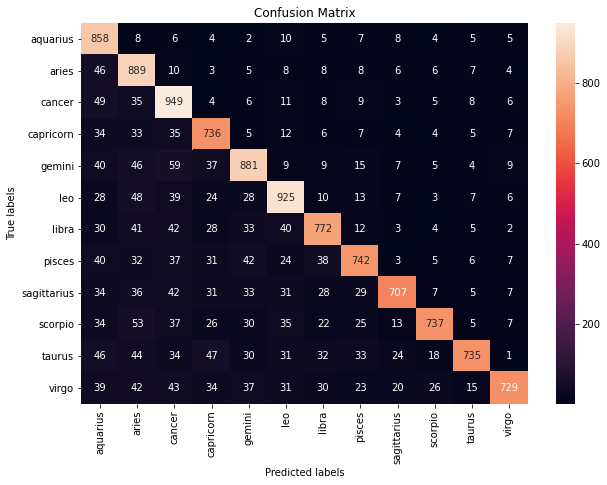

In [42]:
plt.figure(figsize=(10, 7))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='d');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(labels); 
ax.yaxis.set_ticklabels(labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 65 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data. 

In [43]:
tree_modelo.get_depth()

65

To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
resultado = cross_val_score(tree_modelo, X_train, y_train, cv=kfold, scoring='accuracy')

print(resultado)
print('Baseline: {}% ({}%)'.format(np.round(resultado.mean()*100, 2), np.round(resultado.std()*100, 2)))

[0.08670989 0.09643436 0.08508914 0.08306321 0.08998784]
Baseline: 8.83% (0.47%)


The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

In [45]:
tree_modelo = DecisionTreeClassifier(max_depth=20).fit(X_train, y_train)
tree_predicoes = tree_modelo.predict(X_train)

In [46]:
print(classification_report(y_train, tree_predicoes))

              precision    recall  f1-score   support

    aquarius       0.46      0.32      0.38       922
       aries       0.42      0.30      0.35      1000
      cancer       0.27      0.43      0.33      1093
   capricorn       0.51      0.25      0.33       888
      gemini       0.19      0.48      0.27      1121
         leo       0.33      0.33      0.33      1138
       libra       0.60      0.26      0.36      1012
      pisces       0.37      0.27      0.31      1007
 sagittarius       0.44      0.26      0.33       990
     scorpio       0.72      0.23      0.34      1024
      taurus       0.28      0.36      0.31      1075
       virgo       0.27      0.35      0.31      1069

    accuracy                           0.32     12339
   macro avg       0.41      0.32      0.33     12339
weighted avg       0.40      0.32      0.33     12339



If we check again with cross validation, the new model is still averaging ~8% which is not very good. 

In [47]:
resultado = cross_val_score(tree_modelo, X_train, y_train, cv=kfold, scoring='accuracy')

print(resultado)
print('Baseline: {}% ({}%)'.format(np.round(resultado.mean()*100, 2), np.round(resultado.std()*100, 2)))

[0.09076175 0.09319287 0.09359806 0.0923825  0.08552898]
Baseline: 9.11% (0.29%)


In [48]:
knn_predicoes_Val = knn_modelo.predict(X_val)
print(classification_report(y_val, knn_predicoes_Val))

              precision    recall  f1-score   support

    aquarius       0.08      0.18      0.11       340
       aries       0.09      0.18      0.12       328
      cancer       0.11      0.18      0.14       364
   capricorn       0.10      0.11      0.10       309
      gemini       0.08      0.06      0.07       375
         leo       0.11      0.08      0.09       378
       libra       0.08      0.05      0.06       342
      pisces       0.11      0.07      0.08       327
 sagittarius       0.07      0.04      0.05       322
     scorpio       0.05      0.03      0.03       332
      taurus       0.09      0.06      0.07       315
       virgo       0.08      0.04      0.06       382

    accuracy                           0.09      4114
   macro avg       0.09      0.09      0.08      4114
weighted avg       0.09      0.09      0.08      4114



In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct. 

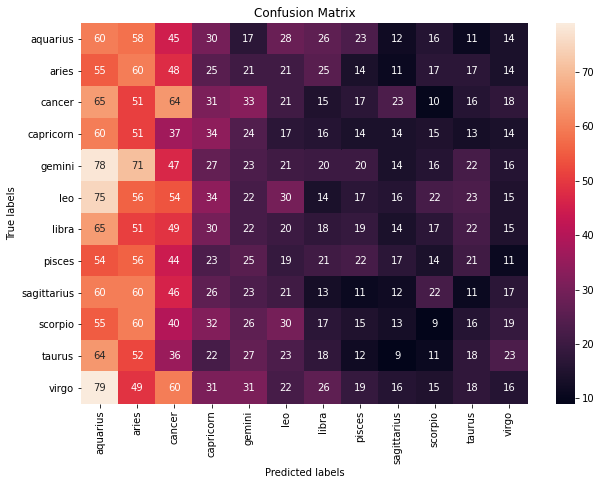

In [49]:
final_cm = confusion_matrix(y_val, knn_predicoes_Val)
knn_labels = knn_modelo.classes_

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

### Conclusion

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.